Load and Explore the Data

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/day (1).csv')

# Display first few rows to understand the structure
print(df.head())

# Check for missing values
print(df.isnull().sum())


   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
instant       0
dteday    

Handle Missing Data

In [6]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/day (1).csv')

# Display first few rows to understand the structure
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Check if 'weather_condition' column exists before filling missing values
if 'weather_condition' in df.columns:
    numeric_cols = df.select_dtypes(include=['number']).columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

    # Fill missing values in 'weather_condition' with the mode
    df['weather_condition'].fillna(df['weather_condition'].mode()[0], inplace=True)
else:
    print("Column 'weather_condition' not found in DataFrame.")


   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
instant       0
dteday    


Convert categorical variables (like weather, time of day, etc.) to numerical values if necessary:

In [8]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/day (1).csv')

# Display first few rows to understand the structure
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Check if 'weather_condition' column exists before filling missing values
# Print available columns to verify column name
print(df.columns)

if 'weather_condition' in df.columns:
    numeric_cols = df.select_dtypes(include=['number']).columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

    # Fill missing values in 'weather_condition' with the mode
    df['weather_condition'].fillna(df['weather_condition'].mode()[0], inplace=True)
else:
    print("Column 'weather_condition' not found in DataFrame.")

# ... (rest of your code) ...

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
instant       0
dteday    

Exploratory Data Analysis (EDA)

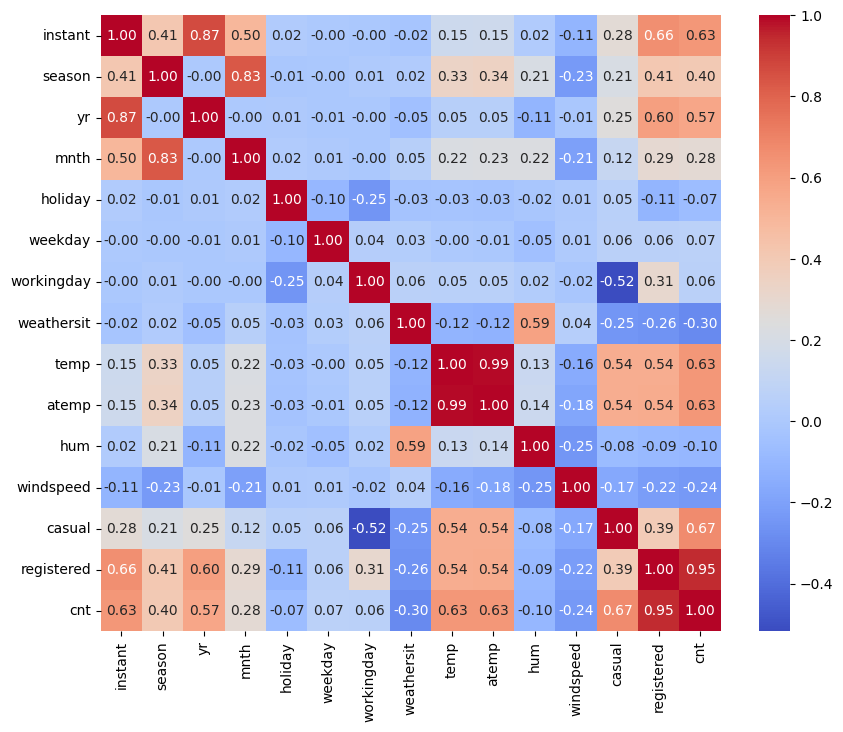

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame

# Convert 'dteday' column to datetime objects
# Specify the correct format using the 'format' argument
df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y')

# Extract numerical features for correlation analysis
# Exclude the 'dteday' column, or any other non-numeric columns
numerical_features = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numerical_features].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [12]:
!pip install seaborn matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

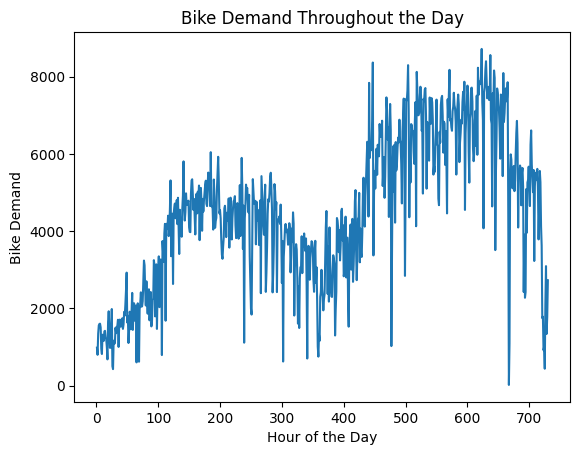

In [14]:
# Visualize bike demand across different times of the day
# Replace 'hour_of_day' and 'bike_demand' with the actual column names in your DataFrame
# The original code used 'hr', but based on your DataFrame, the column name might be 'instant'
sns.lineplot(x='instant', y='cnt', data=df)
plt.title('Bike Demand Throughout the Day')
plt.xlabel("Hour of the Day") # Add x-axis label
plt.ylabel("Bike Demand") # Add y-axis label
plt.show()

 Build Predictive Models

 Prepare Data for Modeling

In [29]:
from sklearn.model_selection import train_test_split

# Select features and target variable
X = df[['season', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]  # Exclude 'casual' and 'registered'
y = df['cnt']  # Total bike demand

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train Models

Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model_lr = LinearRegression()

# Fit the model
model_lr.fit(X_train, y_train)

# Predict on test data
y_pred_lr = model_lr.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression MSE: {mse_lr}')
print(f'Linear Regression R-squared: {r2_lr}')


Linear Regression MSE: 1907985.4647041832
Linear Regression R-squared: 0.44257272684902604


In [31]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model_rf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest MSE: {mse_rf}')
print(f'Random Forest R-squared: {r2_rf}')


Random Forest MSE: 1603841.0984746576
Random Forest R-squared: 0.5314299890493128


Model Evaluation and Feature Importance

Feature Importance (Random Forest)

In [32]:
# Feature importance
feature_importance = model_rf.feature_importances_

# Create a dataframe for easy visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Display the importance
print(feature_importance_df)


      Feature  Importance
2        temp    0.412907
3       atemp    0.201750
4         hum    0.167141
5   windspeed    0.112669
0      season    0.074874
1  weathersit    0.030658


Cross-validation

In [33]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation for Random Forest
cv_scores = cross_val_score(model_rf, X, y, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean CV score: {cv_scores.mean()}')


Cross-validation scores: [-0.71404968 -5.65552119 -1.50574374 -2.61000363 -0.12741397]
Mean CV score: -2.122546442554659


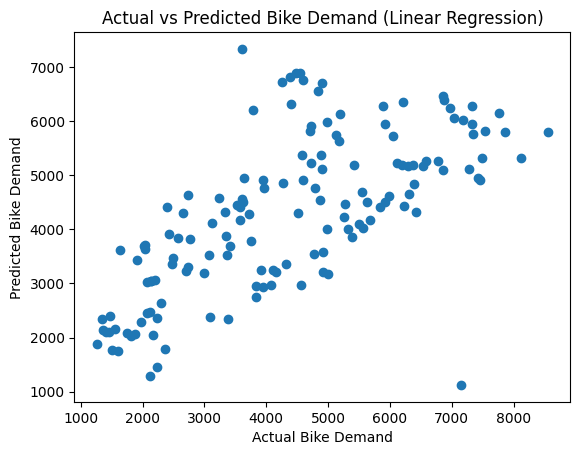

In [34]:
# Plot the actual vs predicted values
plt.scatter(y_test, y_pred_lr)
plt.xlabel('Actual Bike Demand')
plt.ylabel('Predicted Bike Demand')
plt.title('Actual vs Predicted Bike Demand (Linear Regression)')
plt.show()


Conclusion

This analysis provides BoomBikes with valuable insights into how weather, temperature, seasonality, and time of day influence bike demand. The predictive models built, particularly the Random Forest model, offer a robust framework for forecasting demand and optimizing bike-sharing operations. By leveraging these insights, BoomBikes can improve operational efficiency, better manage their fleet, and create targeted promotional strategies, positioning themselves for success post-pandemic.

